In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
def load_model(network, sparse_method, dataset, hyp_name, hype_value, sparse_thr):
    ckpt_name = f"runs/{network}-{sparse_method}-{dataset}/{hyp_name}={hype_value}/prune_rate=0.0/checkpoints/model_best.pth"
    load_dict = torch.load(ckpt_name)
    parameter_dict = load_dict['state_dict']
    best_test_acc1 = load_dict['best_acc1']
    total = 0
    nonzero = 0
    for k, v in parameter_dict.items():
        total += v.numel()
        nonzero += (v > sparse_thr).float().sum()
    comp_ratio = total / nonzero
    return comp_ratio.item(), best_test_acc1
    

In [3]:
load_model('resnet18', 'l1', 'cifar10', 'l1', '1e-4', 1e-3)

(301.04241943359375, 73.25)

In [4]:
hypvalue = "1e-7 3e-7 1e-6 3e-6 1e-5 3e-5 1e-4 3e-4 1e-3".split()
x = []
y = []
for hypv in hypvalue:
    _x, _y = load_model('resnet18', 'l1', 'cifar10', 'l1', hypv, 1e-3)
    x.append(_x)
    y.append(_y)
l1_cifar10_xy = [x, y]

x = []
y = []
for hypv in hypvalue:
    _x, _y = load_model('resnet18', 'l1', 'cifar100', 'l1', hypv, 1e-3)
    x.append(_x)
    y.append(_y)
l1_cifar100_xy = [x, y]

In [16]:
str_cifar10_spar = [8.95e-6, 97.62, 97.67, 99.54, 99.93]
str_cifar10_xy = [
    [100 / (100 - s) for s in str_cifar10_spar],
    [97.15, 94.32, 93.44, 83.04, 64.67],
]

str_cifar100_spar = [95.73,99.03,99.64,99.98]
str_cifar100_xy = [
    [100 / (100 - s) for s in str_cifar100_spar],
    [82.15,58.62,40.74,5.48],
]

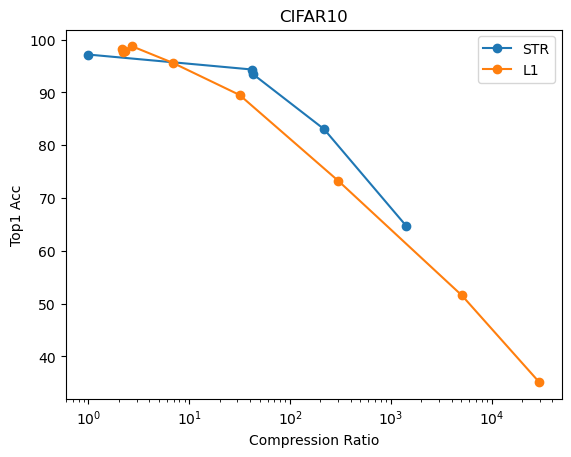

In [22]:
x, y = str_cifar10_xy
plt.plot(x, y, label="STR", marker='o')
x, y = l1_cifar10_xy
plt.plot(x, y, label="L1", marker='o')
plt.legend()
plt.xscale('log')
plt.title("CIFAR10")
plt.ylabel("Top1 Acc")
plt.xlabel("Compression Ratio")
plt.show()

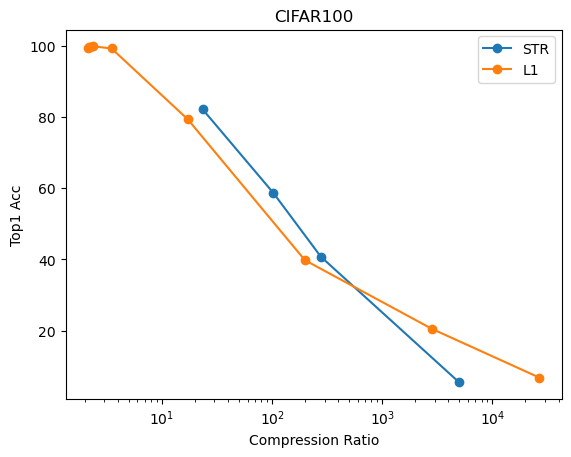

In [23]:
x, y = str_cifar100_xy
plt.plot(x, y, label="STR", marker='o')
x, y = l1_cifar100_xy
plt.plot(x, y, label="L1", marker='o')
plt.legend()
plt.xscale('log')
plt.title("CIFAR100")
plt.ylabel("Top1 Acc")
plt.xlabel("Compression Ratio")
plt.show()